# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import urllib.request
import zipfile
import os

# Download the file
if 'traffic-signs-data.zip' not in os.listdir():
    print("Downloading the traffic signs data file.")
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip"
    urllib.request.URLopener().retrieve(url, "traffic-signs-data.zip")
    print("Downloaded")
else:
    print("Traffic signs data file already downloaded")

# Unzip it
if not os.path.exists('traffic-signs-data'):
    print("Unzipping the traffic signs data file.")
    zipped_data = zipfile.ZipFile('traffic-signs-data.zip')
    zipped_data.extractall('traffic-signs-data') 
    print("Unzipped")
else:
    print("The traffic signs data file is already unzipped.")

Traffic signs data file already downloaded
The traffic signs data file is already unzipped.


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
# Get a dictionary from the signnames file
import csv

with open('signnames.csv') as file:
    sign_names = dict(csv.reader(file))
    sign_names.pop('ClassId') # Don't need to do this but oh well.

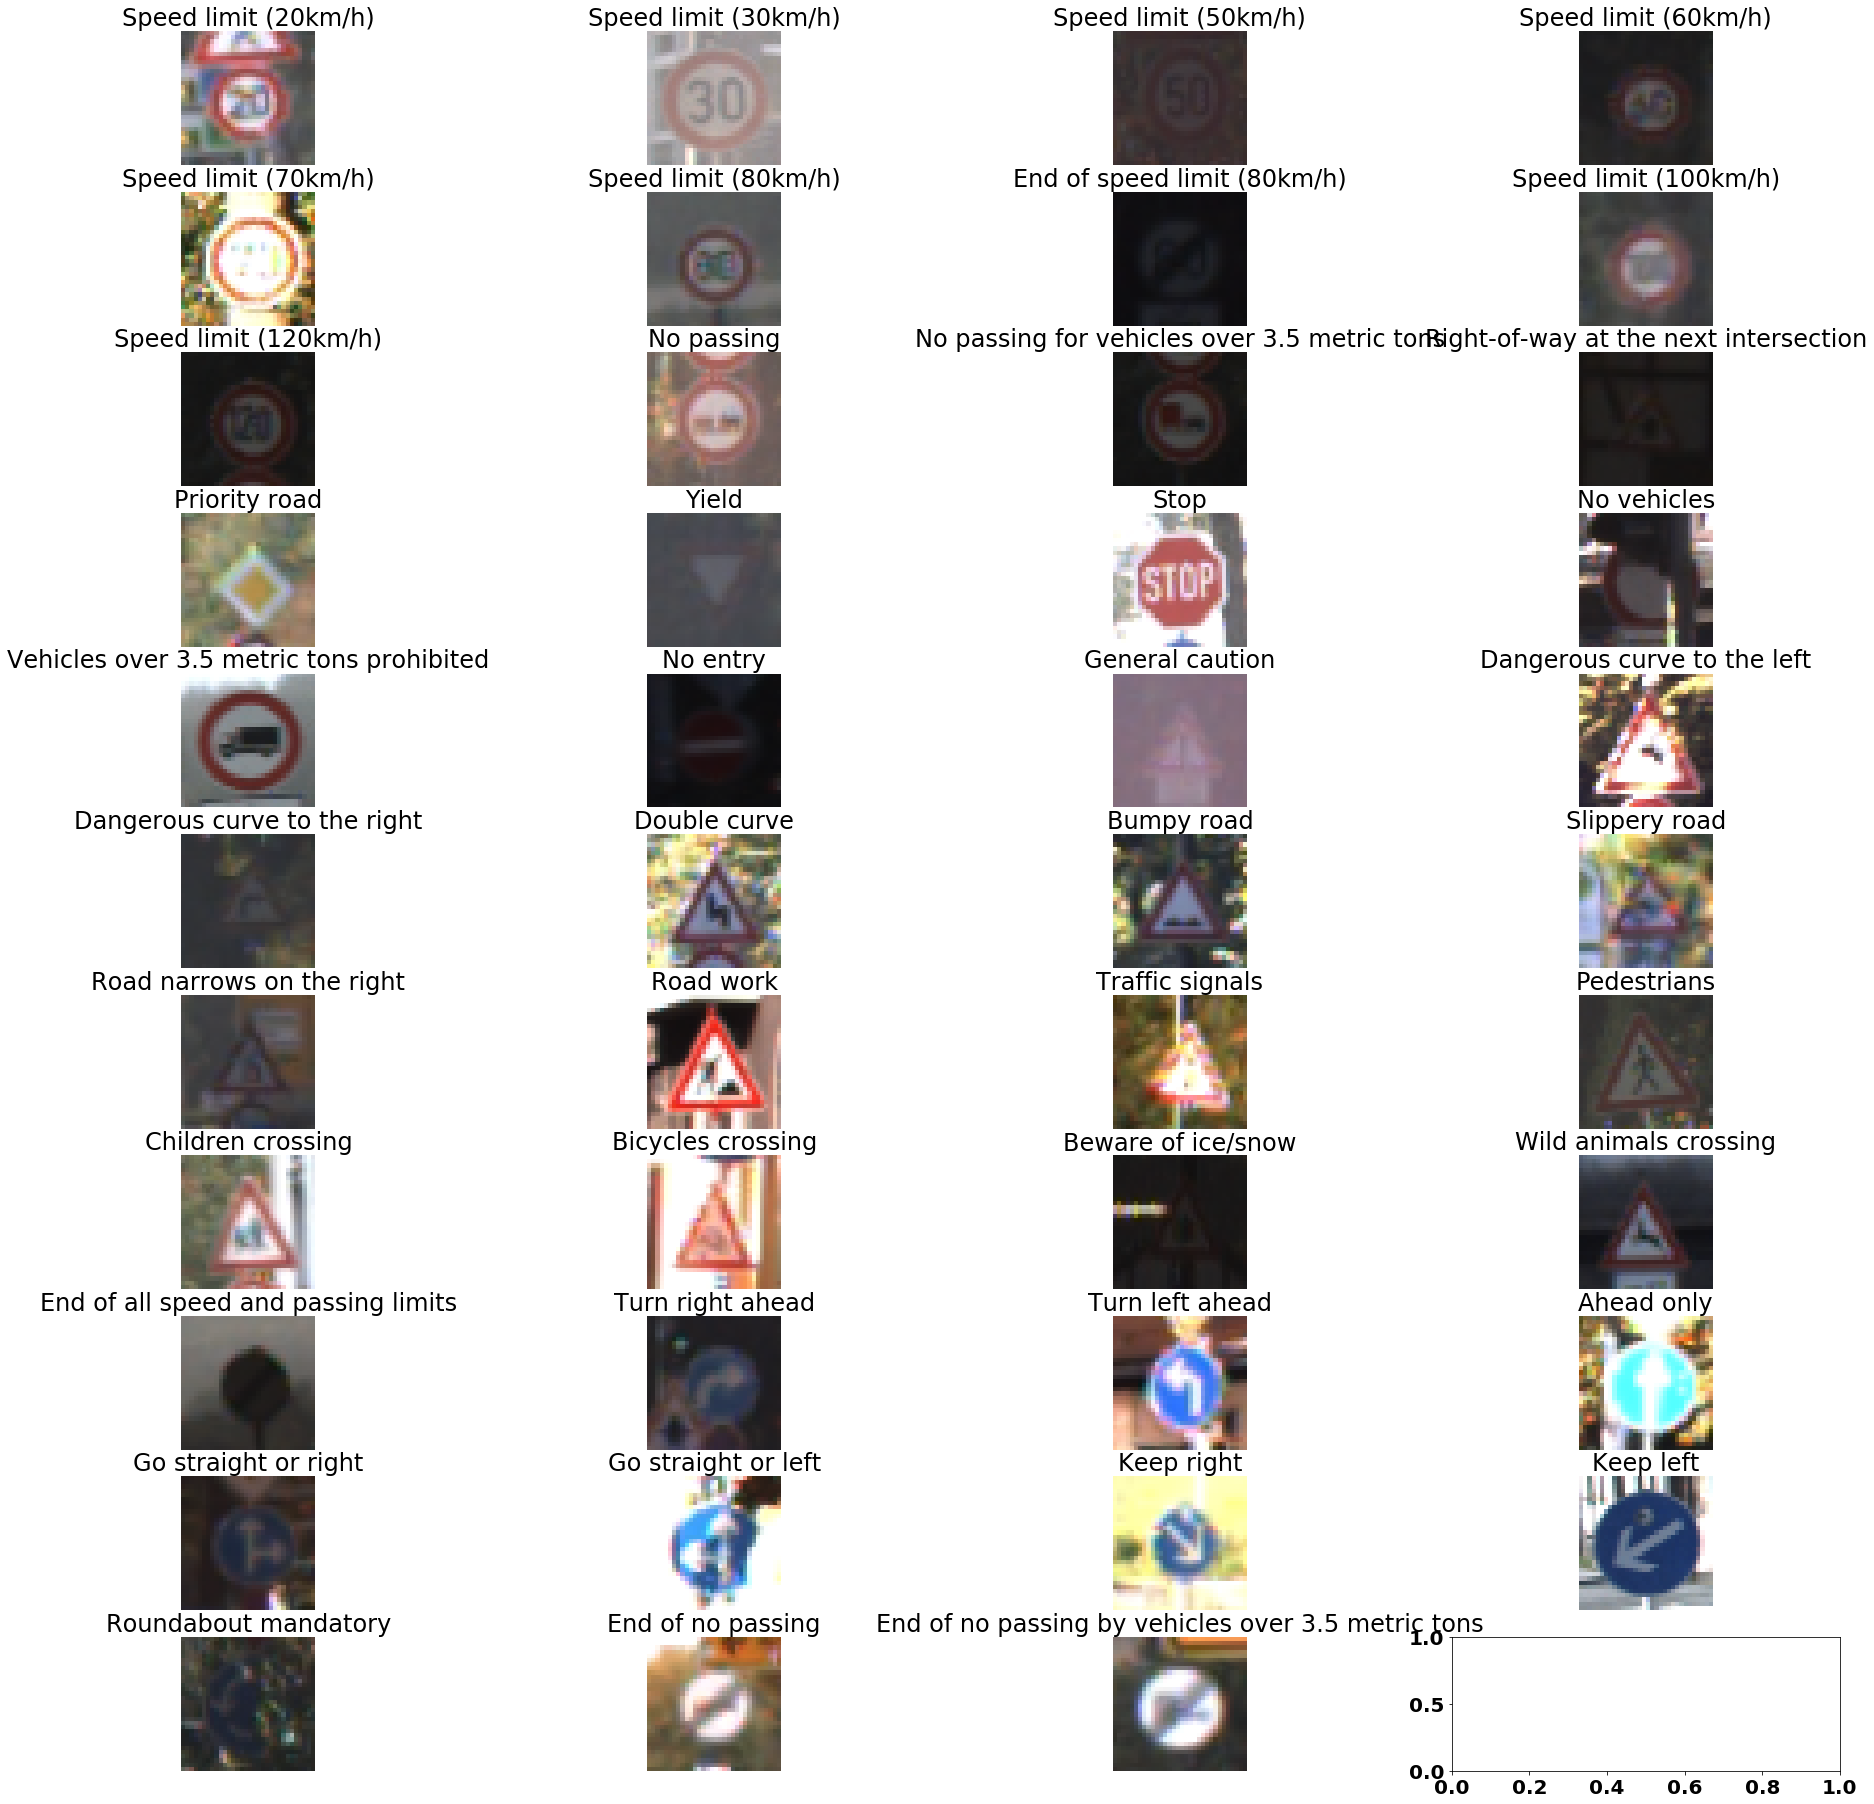

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from matplotlib import rc
# Visualizations will be shown in the notebook.
%matplotlib inline

# DONE Show one of each class
# DONE Display the sign names instead of the number
# DONE Make the labels big enough to read.
# DONE Arrange the images in nice rows
# TODO Only create enough subplots to display one of each class

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}

rc('font', **font)     

# Get one of each sign
training_list = zip(X_train, y_train)
visualization_X = []
visualization_y = []
for x,y in training_list:
    if y not in visualization_y:
        visualization_X.append(x)
        visualization_y.append(y)

fig, axes = plt.subplots(11, 4, figsize=(32,32))
for image, label, ax in zip(visualization_X, visualization_y, axes.flat[:n_classes]):
    ax.imshow(image)
    ax.set_title(sign_names[str(label)])
    ax.axis('off')  # clear x- and y-axes
    

plt.show()

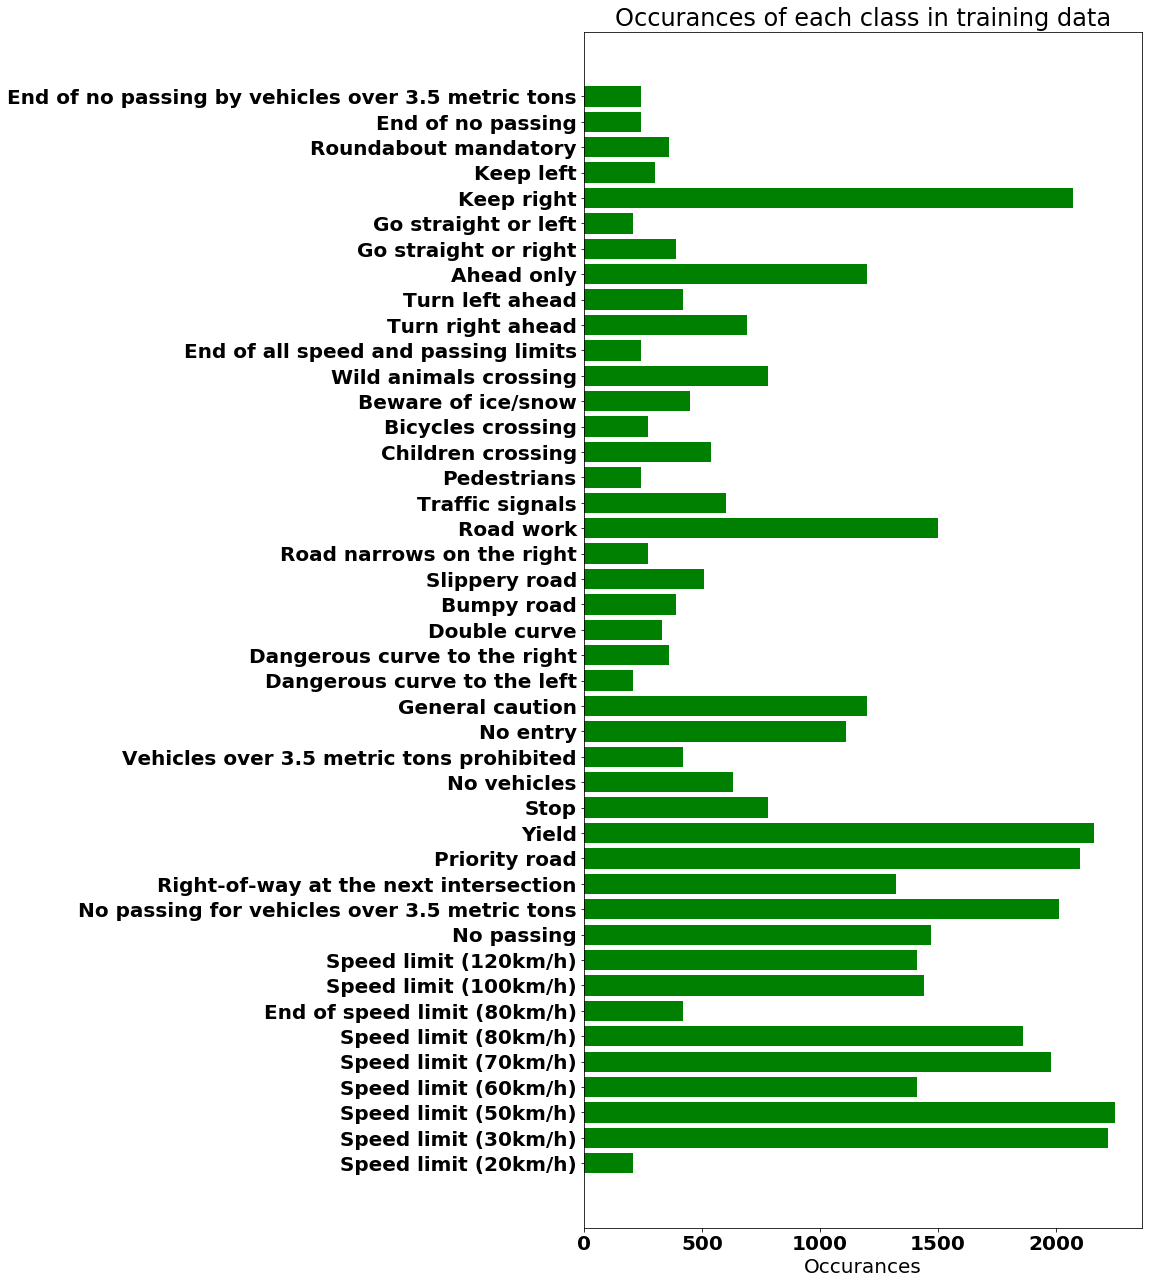

In [6]:
# Plotting the distribution of classes
import numpy as np

occurances = [list(y_train).count(x) for x in visualization_y]
fig, ax = plt.subplots(figsize=(10,22))
graph = ax.barh(visualization_y, occurances, color='g')
# add some text for labels, title and axes ticks
ax.set_xlabel('Occurances')
ax.set_title('Occurances of each class in training data')
ax.set_yticks(visualization_y)
labels = [sign_names[str(label)] for label in visualization_y]
ax.set_yticklabels(labels)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
def histogram_equilization(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[image]

X_train = histogram_equilization(X_train)

In [12]:
# TODO (Maybe) Balance out classes. 
# If there is a large disparity in the number of data points in each class, I might cut out some to make it even.
# I used this as a resource: http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

import cv2

# Converting the images to grayscale
def convert_to_grayscale(X_values):
    gray_X_values = []
    for image in X_values:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        shaped_gray_image = np.reshape(gray_image, (32,32,1))
        gray_X_values.append(shaped_gray_image)
        
    return gray_X_values

X_train = convert_to_grayscale(X_train)

I used this page as a resource for the following block: http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

In [17]:
# Here I'm normalizing the data so it falls between values of -1 and 1
def normalize_image_data(x):
    return x/128 - 1

vnorm = np.vectorize(normalize_image_data)

X_train = vnorm(X_train)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I converted the images to grayscale.
I did that because I think the color of the signs is not unique enough of a feature.  Many different signs are contained in a red outline with a white background.  The shape of the sign and the shape of the symbol in the sign would make a better unique identifier for each sign type.

I also normalized the image data so that the pixel values fell in a range between -1 and 1 instead of 0 to 255.
This brings the mean closer to 0 and which could make training easier.

In [18]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [19]:
# Getting a Validation set by splitting the training set.
# David gave this code in the lecture.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Also shuffling the data. This comes straight from the LeNet lab solution.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I created a validation set that I could use to help me test the accuracy of the network so that I can avoid using the test set until the very end. This helps prevent overfitting the model to the test set, so the model can generalize well.

The test and training set were already split from the source of the data.
I carved the validation set from the training set as was suggested by the code in the lecture.

I shuffled the training set to help prevent the network from awkwardly fitting to the data.  I think that if I trained the data by showing it only one type of sign at a time, it would be more likely to be biased towards the last type that it saw.

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# I'm starting with the LeNet architecture as per the suggestion because I agree that it is a good start.
# Again, pasted straight from the LeNet Lab Solution.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # David changed the input depth to 3 here.  But I decided to convert to grayscale so I'm leaving it at 1.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # Changing this from 10 to 43 was a given from David.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43) # Changed to 43 as given by David.

In [22]:
#Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    best_accuracy = 0
    consecutive_submax_epochs = 0
    max_consecutive_submax_epochs = 3
    total_epochs = 0
    max_total_epochs = 20
    print("Training...")
    print()
    while consecutive_submax_epochs < max_consecutive_submax_epochs and total_epochs < max_total_epochs:
        total_epochs += 1
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(total_epochs))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if best_accuracy <= validation_accuracy:
            best_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            consecutive_submax_epochs = 0
            print("Model saved with {:.3f} validation accuracy".format(validation_accuracy))
        else:
            consecutive_submax_epochs += 1
        print()
    if total_epochs == max_total_epochs:
        print("Ran max epochs.")
    elif consecutive_submax_epochs == max_consecutive_submax_epochs:
        print("Stopping early.")
    else:
        print("Something happened and I don't know what it was.")

Training...

EPOCH 1 ...
Validation Accuracy = 0.687
Model saved with 0.687 validation accuracy

EPOCH 2 ...
Validation Accuracy = 0.843
Model saved with 0.843 validation accuracy

EPOCH 3 ...
Validation Accuracy = 0.872
Model saved with 0.872 validation accuracy

EPOCH 4 ...
Validation Accuracy = 0.906
Model saved with 0.906 validation accuracy

EPOCH 5 ...
Validation Accuracy = 0.917
Model saved with 0.917 validation accuracy

EPOCH 6 ...
Validation Accuracy = 0.921
Model saved with 0.921 validation accuracy

EPOCH 7 ...
Validation Accuracy = 0.933
Model saved with 0.933 validation accuracy

EPOCH 8 ...
Validation Accuracy = 0.945
Model saved with 0.945 validation accuracy

EPOCH 9 ...
Validation Accuracy = 0.948
Model saved with 0.948 validation accuracy

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.959
Model saved with 0.959 validation accuracy

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validat

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:** I used 10 epochs with a batch size of 128.
My learning rate was .001.
I used the Adam Optimizer to minimize the mean.
This was all exactly as you'll find in the LeNet Lab solution. I didn't have to make modifications to the parameters to get an ok accuracy.

I used early stopping too which helped get a better accuracy in less time.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with the LeNet achitecture that we used on the MNIST dataset.
I really didn't change it at all. 
I converted the images to grayscale because the solution in the referenced paper got better results from using grayscale images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [25]:
# I downloaded 5 images from google images.  I cropped them and scaled them using gimp.
import os
new_signs_jpgs = os.listdir('new_images')

from PIL import Image
new_signs_pixel_data = {}
for image in new_signs_jpgs:
    im = Image.open('new_images/' + image)
    new_signs_pixel_data[image] = np.asarray(im)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The stop sign was behind a wire fence.
The general caution sign is angled slightly to the left.
The yield sign has a white spot on the top red bar.

In [28]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

X_new = []
y_new = []
# Assigning labels
X_new.append(new_signs_pixel_data['no_passing.jpg'])
y_new.append(9)

X_new.append(new_signs_pixel_data['speed30.jpg'])
y_new.append(1)

X_new.append(new_signs_pixel_data['yield.jpg'])
y_new.append(13)

X_new.append(new_signs_pixel_data['caution.jpg'])
y_new.append(18)

X_new.append(new_signs_pixel_data['stop.jpg'])
y_new.append(14)

#Make it an Numpy array

X_new = np.asarray(X_new)

#Histogram Equalization
X_new = histogram_equilization(X_new)

#Converting to grayscale
X_new = convert_to_grayscale(X_new)

#Normalizing
X_new = vnorm(X_new)

Got some help from Stack Overflow on loading the model:
http://stackoverflow.com/questions/33759623/tensorflow-how-to-restore-a-previously-saved-model-python

In [29]:
return_prediction = tf.argmax(logits,1)

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print('Predicted:')
    print(sess.run(return_prediction, feed_dict={x: X_new}))
    print('Actual:')
    print(y_new)

Predicted:
[10  5 38 20 10]
Actual:
[9, 1, 13, 18, 14]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model actually predicted 4 out of 5 correctly (80%). It misclassified the stop sign as a 60km/h speed limit sign.

In [30]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
topfive = tf.nn.top_k(tf.nn.softmax(logits), k=5)

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print('Predicted:')
    print(sess.run(topfive, feed_dict={x: X_new}))
    print('Actual:')
    print(y_new)

Predicted:
TopKV2(values=array([[ 0.09118278,  0.06700965,  0.05761269,  0.04841284,  0.04098823],
       [ 0.06995527,  0.0663691 ,  0.06147541,  0.05611563,  0.04661834],
       [ 0.0653817 ,  0.06232364,  0.05610941,  0.05424157,  0.05097159],
       [ 0.05590681,  0.05502889,  0.04427484,  0.04071508,  0.03868427],
       [ 0.06867331,  0.05606207,  0.05081922,  0.04716285,  0.04554457]], dtype=float32), indices=array([[10, 38, 20,  9,  5],
       [ 5,  6,  3, 10, 38],
       [38,  3,  6, 32, 10],
       [20, 10, 38,  5, 26],
       [10, 38,  6,  3,  5]], dtype=int32))
Actual:
[9, 1, 13, 18, 14]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
I deleted the example because I felt like it was in the way.
```

**Answer:** For the 4 correct predictions, the model was almost 100% certain of it's prediction.

The interesting result comes from the stop sign.  It misclassified the stop sign as a speed limit sign.  
The top five predictions for the stop sign were speed limit signs.
I am pretty sure this is because the stop sign has a capital O which is very similar in shape to the zero in the speed limit signs.

I think that if I didn't convert the images to grayscale then the stop signs might have been correctly classified.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.